
## Topic:Predictive Maintenance Using Machine Learning


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Reading the data using pandas library(data from a csv file into a pandas dataframe)
df=pd.read_csv(r"C:\Users\Dell\Desktop\predictive_maintenance.csv")

Dataset Link:
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [3]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [4]:
#Checking missing values in the dataset
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
#To get the statistical insight from the dataset
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

<AxesSubplot:>

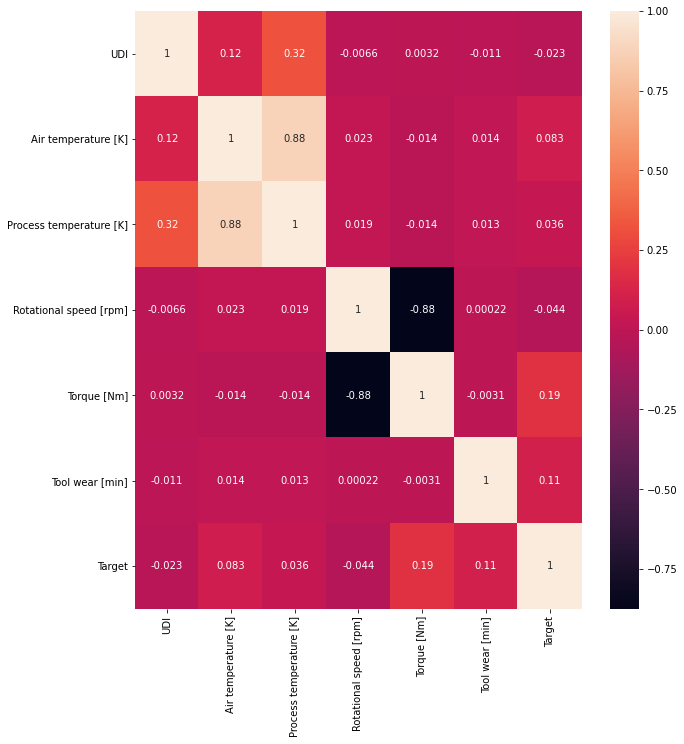

In [6]:
#Plotting the Heatmap
plt.figure(figsize=(10,11))
sn.heatmap(df.corr(),annot=True)

For the given dataset,the target variable is 'Target'.From the heatmap,we get the following inferences:
* Torque has a correlaton of 0.19 with Target
* Tool wear has a correlation of 0.11 with Target
* Air temperature has a correlation of 0.083 with Target followed by Process temperature with correlation of 0.036.
* Rotational speed has a negative correlation of -0.044 with Target

We can assume that,since Torque and Tool wear has the highest correlation with Target,these features contribute more towards failure.

In [7]:
#To see how many Failure Type are there in the dataset
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

There are mainly 5 different types of failure.They are as follows:
* Heat Dissipation Failure,
* Power Failure 
* Overstrain Failure
* Tool Wear Failure 
* Random Failure

From the analysis of the failure count we could understand that most of the failure occurs due to 'Heat Dissipiation Failure'. 

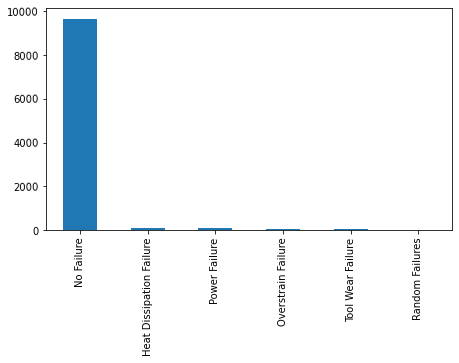

In [8]:
#Plotting the Failure Type column
plt.subplot(221)
df["Failure Type"].value_counts().plot(kind="bar",figsize=(16,9))
plt.yticks(rotation=1)
plt.show()

From the above figure we can see that No Failure is more dominant in number than rest of the type of failures.Hence,we can conclude that the dataset is unbalanced.

In [9]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [10]:


df.groupby(['Target','Failure Type']).count().drop(['UDI', 'Product ID','Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [11]:
#Plotting 3D Scatter Plot
fig=px.scatter_3d(df,x='Tool wear [min]',y='Torque [Nm]',z='Rotational speed [rpm]',color='Target')
fig.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Comparison Between Air temperature and Process temperature Based On Failure Type'}, xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

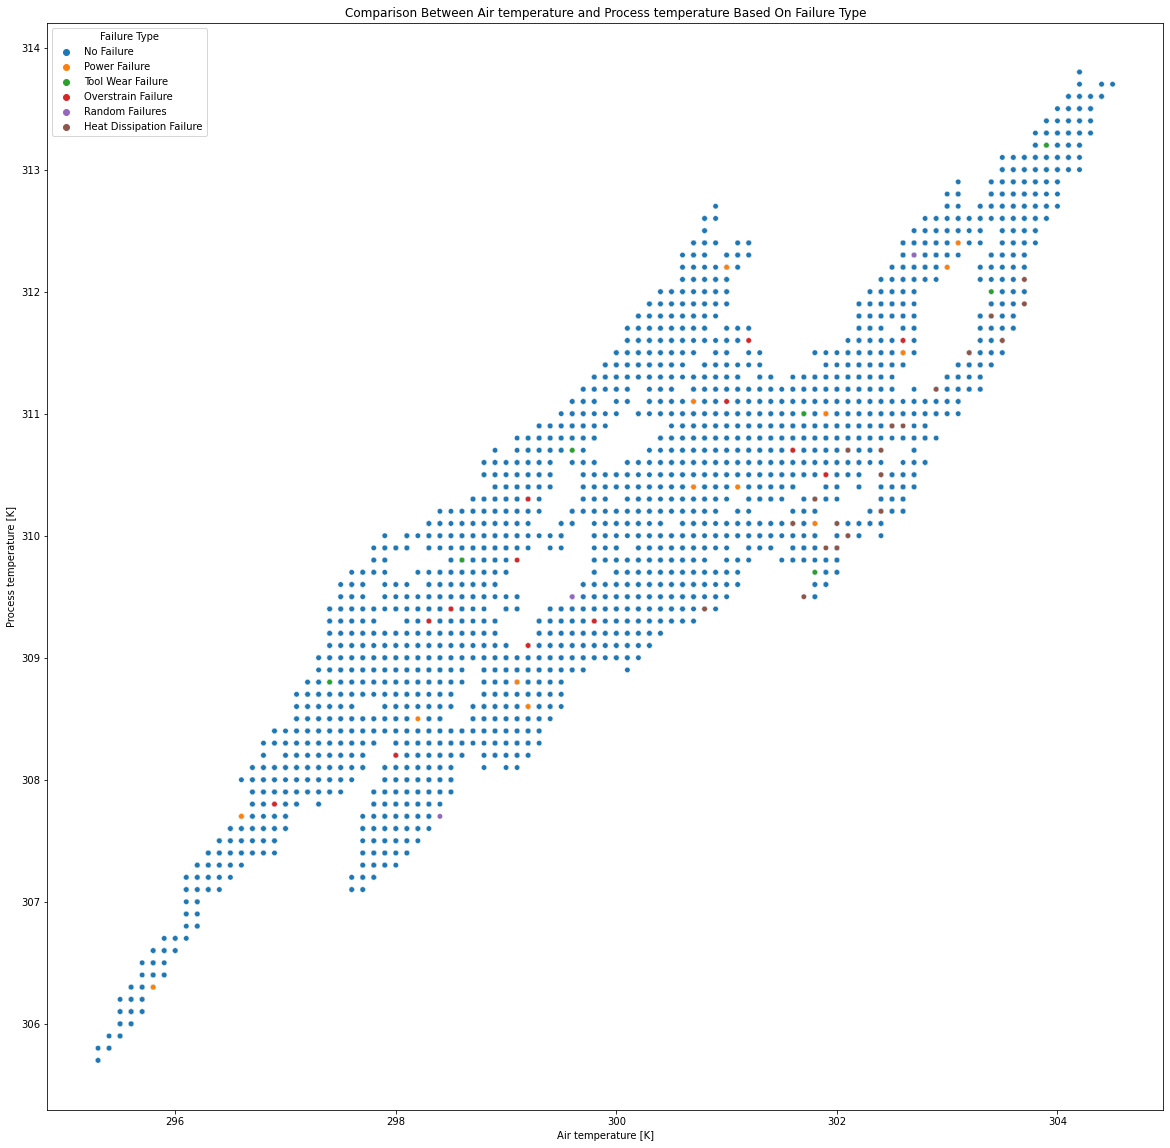

In [12]:
#Plotting the Scatter Plot of Air temperature and Process temperature based on Failure Type
plt.figure(figsize=(20,20))
plt.title("Comparison Between Air temperature and Process temperature Based On Failure Type")
sn.scatterplot(df["Air temperature [K]"],df["Process temperature [K]"],hue=df["Failure Type"],s=30)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Comparison Between Air temperature and Process temperature Based On Target'}, xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

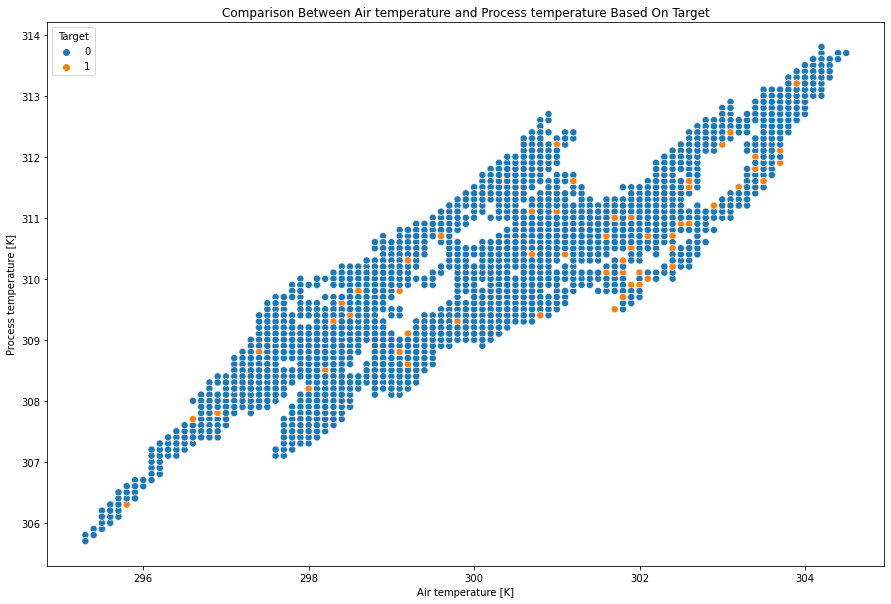

In [13]:
#Plotting the Scatter Plot of Air temperature and Process temperature based on Target
plt.figure(figsize=(15,10))
plt.title("Comparison Between Air temperature and Process temperature Based On Target")
sn.scatterplot(df["Air temperature [K]"],df["Process temperature [K]"],hue=df["Target"],s=50)

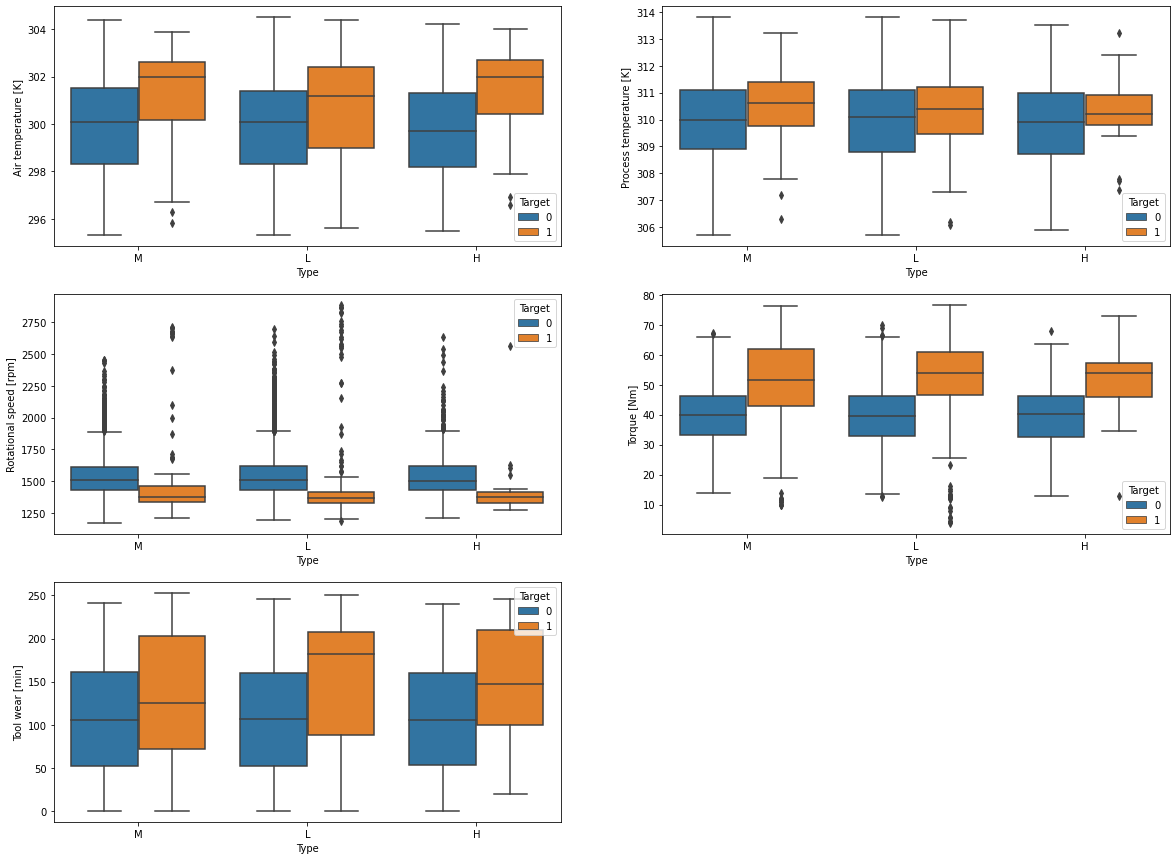

In [14]:
#Plotting the Box Plot
plt.figure(figsize=(20,15))
j=1
for i in ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']:
    plt.subplot(3,2,j)
    sn.boxplot(data=df,y=i,x="Type",hue="Target")
    j+=1

Box plot for some of important features were drawn.

* The feature 'Tool wear','Air  temperature'and 'Process tempeature' had the least number of outilers compared to all the other features.
* Rotational speed had the most number of outliers and these outliers was seen for all the classes of products. 
* In the case of torque most outliers was seen for the product class 'L' and all the other classes had negligible amount of outliers.

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

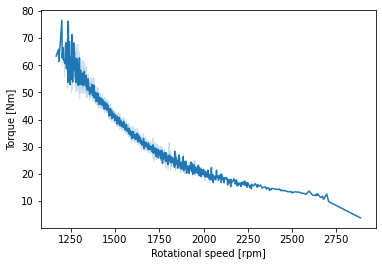

In [15]:
#Plotting the Line Plot of Rotational speed and Torque
sn.lineplot(data=df,x="Rotational speed [rpm]",y="Torque [Nm]")

<AxesSubplot:ylabel='Density'>

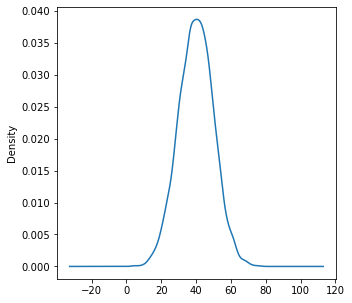

In [16]:
#Plotting the Density Plot for Torque
plt.figure(figsize=(5,5))
df["Torque [Nm]"].plot(kind='density')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

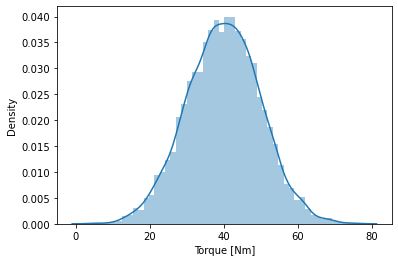

In [17]:
#Plotting the Distribution Plot Of Torque
sn.distplot(df["Torque [Nm]"])

In [18]:
#Plotting the type of product quality variant 
df["Type"].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2]), [Text(0, 0, 'M'), Text(1, 0, 'L'), Text(2, 0, 'H')])

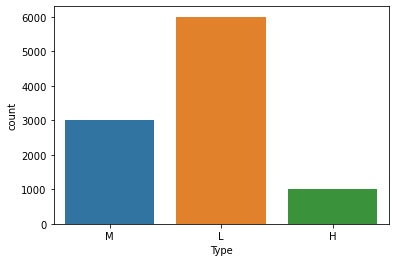

In [19]:
#Plotting the Count Plot of the type of product quality variant 
sn.countplot(df['Type'])
plt.xticks(rotation=0)

* L-Low
* M-Medium
* H-High

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

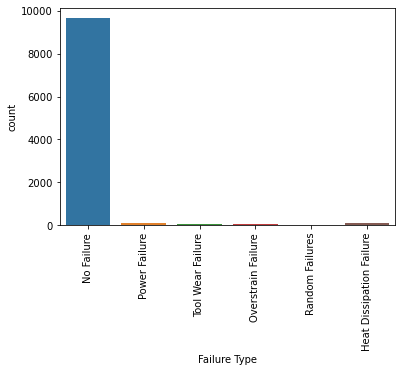

In [20]:
#Plotting the Count Plot for Failure Type
sn.countplot(df['Failure Type'])
plt.xticks(rotation=90)

In [21]:
#Plotting to see how many Targets are there in the data with their respective numbers
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Target', ylabel='count'>

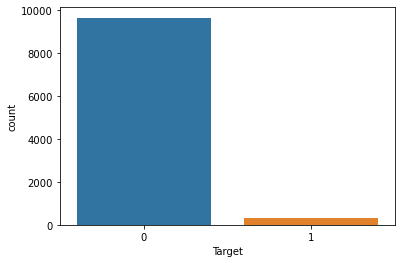

In [22]:
#Plotting the Count Plot for target
sn.countplot(df["Target"])

* 0-No failure
* 1-Failure

We can see that No failure (0) is more number than Failure (1),here we can conclude that the data is unbalanced.

In [23]:
df.corr()

UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Target                  -0.022892             0.082556   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Torque [Nm]                            -0.014061               -0.875027   
Tool wear [min]                         0.013488                0.000223   
Target                                  0.035946               -0.044188   

                         Torque [Nm]  Tool wear [min]    Target  
UDI                         0.003207        -0.010702 -0.022892  
Air temperature [K]        -0.013778         0.013853  0.082556  
Process temperature [K]    -0.014061         0.013488  0.035946  
Rotational speed [rpm]     -0.875027         0.000223 -0.044188  
Torque [Nm]                 1.000000        -0.003093  0.191321  
Tool wear [min]            -0.003093         1.000000  0.105448  
Target                      0.191321         0.105448  1.000000

In [24]:
#Before standardization
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [25]:
#Standardization of data
scaler=MinMaxScaler()
df[['Air temperature [K]',"Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]]=scaler.fit_transform(df[['Air temperature [K]',"Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]])

In [26]:
#After standardization
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000             0.511405                 0.531551   
std     2886.89568             0.217419                 0.183177   
min        1.00000             0.000000                 0.000000   
25%     2500.75000             0.326087                 0.382716   
50%     5000.50000             0.521739                 0.543210   
75%     7500.25000             0.673913                 0.666667   
max    10000.00000             1.000000                 1.000000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean                 0.215818      0.497073         0.426684      0.033900  
std                  0.104356      0.136936         0.251597      0.180981  
min                  0.000000      0.000000         0.000000      0.000000  
25%                  0.148428      0.403846         0.209486      0.000000  
50%                  0.194994      0.498626         0.426877      0.000000  
75%                  0.258440      0.590659         0.640316      0.000000  
max                  1.000000      1.000000         1.000000      1.000000

In [27]:
#Categorizing the data
x=df[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]]
y=df[["Target"]]

In [28]:
#Splitting the data into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Target', ylabel='count'>

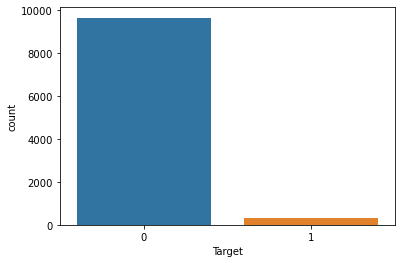

In [29]:
#Before sampling
sn.countplot(df["Target"])

In [30]:
#Under sampling of data
under=RandomUnderSampler(sampling_strategy=0.7,random_state=42) 
x_under_sample,y_under_sample=under.fit_resample(x_train,y_train)

In [31]:
y_under_sample.value_counts()

Target
0         351
1         246
dtype: int64

In [32]:
df=pd.concat([x_under_sample,y_under_sample],axis=1)

In [33]:
df

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0               0.206522                 0.358025                0.440047   
1               0.760870                 0.753086                0.178696   
2               0.597826                 0.493827                0.182771   
3               0.641304                 0.617284                0.218277   
4               0.228261                 0.345679                0.345169   
..                   ...                      ...                     ...   
592             0.108696                 0.185185                0.087893   
593             0.326087                 0.296296                0.142026   
594             0.760870                 0.703704                0.096042   
595             0.543478                 0.740741                0.119907   
596             0.760870                 0.753086                0.116997   

     Torque [Nm]  Tool wear [min]  Target  
0       0.251374         0.644269       0  
1       0.535714         0.150198       0  
2       0.483516         0.675889       0  
3       0.399725         0.158103       0  
4       0.321429         0.300395       0  
..           ...              ...     ...  
592     0.885989         0.094862       1  
593     0.666209         0.861660       1  
594     0.864011         0.810277       1  
595     0.605769         0.877470       1  
596     0.719780         0.822134       1  

[597 rows x 6 columns]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Target', ylabel='count'>

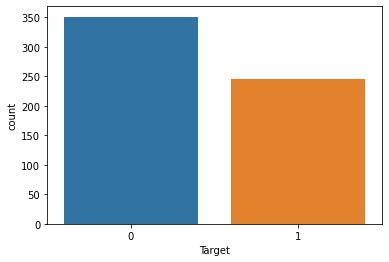

In [34]:
#After under sampling
sn.countplot(df['Target'])

Now,we can see that the data is balanced.

<AxesSubplot:>

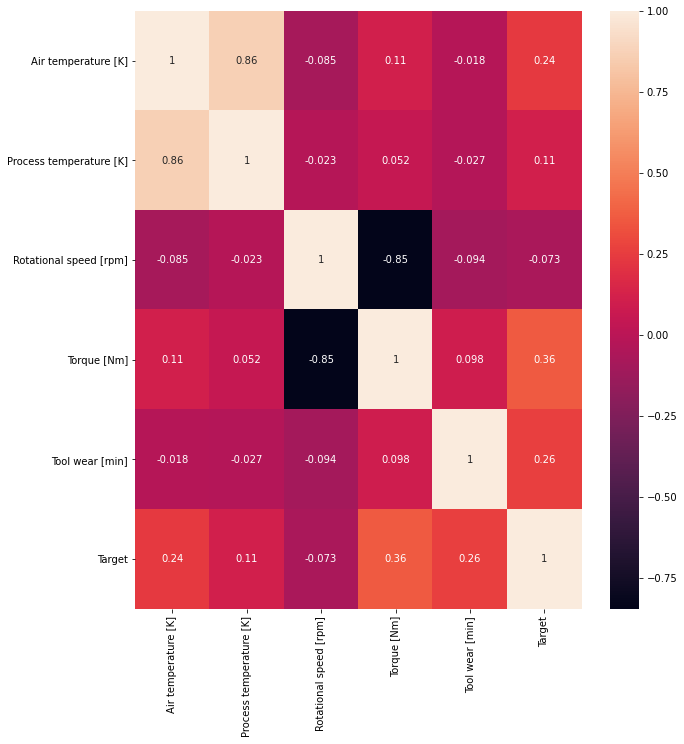

In [35]:
#Plotting the Heatmap (After sampling)
plt.figure(figsize=(10,11))
sn.heatmap(df.corr(),annot=True)

For the given dataset,the target variable is 'Target'.From the heatmap,we get the following inferences:
* Torque has a correlaton of 0.36 with Target
* Tool wear has a correlation of 0.26 with Target
* Air temperature has a correlation of 0.24 with Target followed by Process temperature with correlation of 0.11.
* Rotational speed has a negative correlation of -0.073 with Target

We can assume that,since Torque and Tool wear has the highest correlation with Target (Even after sampling),these features contribute more towards failure.

# Applying The Models

## 1.KNN Classifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_under_sample.values,y_under_sample.values)
pred_knn=knn.predict(x_test)
print(pred_knn)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [37]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc1=accuracy_score(y_test,pred_knn)
print("Accuracy        :",acc1)

prec1=precision_score(y_test,pred_knn)
print("Precision Score :",prec1)

recall1=recall_score(y_test,pred_knn)
print("Recall Score    :",recall1)


f1_knn=f1_score(y_test,pred_knn)
print("f1 Score        :",f1_knn)

Accuracy        : 0.9083333333333333
Precision Score : 0.2191358024691358
Recall Score    : 0.7634408602150538
f1 Score        : 0.3405275779376499


* Accuracy           : 0.9083333333333333 (Here Accuracy comes out to be around 91%,thus we can say that 91/100 predicitons are correct).
* Precision Score    : 0.2191358024691358 (Our model has a precision of 0.22, in other words, when it predicts a failure, it is correct 22% of the time).
* Recall Score       : 0.7634408602150538 (Our model has a recall of 0.76, in other words, it correctly identifies 76% of all failures).
* f1 Score           : 0.3405275779376499

In [38]:
#Classification Report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2907
           1       0.22      0.76      0.34        93

    accuracy                           0.91      3000
   macro avg       0.61      0.84      0.65      3000
weighted avg       0.97      0.91      0.93      3000



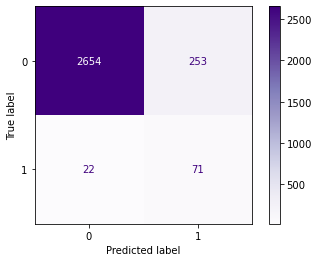

In [39]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative  :2654
* False Positive :253
* False Negative :22
* True Positive  :71

In [40]:
tn_knn=2654
fp_knn=253
fn_knn=22
tp_knn=71

## 2.SVM Classifier

In [41]:
clf_svm=SVC()
clf_svm.fit(x_under_sample.values,y_under_sample.values)
pred_svm=clf_svm.predict(x_test)
print(pred_svm)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but SVC was fitted without feature names



In [42]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc2=accuracy_score(y_test,pred_svm)
print("Accuracy        :",acc2)

prec2=precision_score(y_test,pred_svm)
print("Precision Score :",prec2)

recall2=recall_score(y_test,pred_svm)
print("Recall Score    :",recall2)


f1_svm=f1_score(y_test,pred_svm)
print("f1 Score        :",f1_svm)

Accuracy        : 0.891
Precision Score : 0.20304568527918782
Recall Score    : 0.8602150537634409
f1 Score        : 0.32854209445585214


* Accuracy        : 0.891 (Here Accuracy comes out to be around 89%,thus we can say that 89/100 predicitons are correct).
* Precision Score : 0.20304568527918782 (Our model has a precision of 0.20, in other words, when it predicts a failure, it is correct 20% of the time).
* Recall Score    : 0.8602150537634409 (Our model has a recall of 0.86, in other words, it correctly identifies 86% of all failures).
* f1 Score        : 0.32854209445585214

In [43]:
#Classification Report
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2907
           1       0.20      0.86      0.33        93

    accuracy                           0.89      3000
   macro avg       0.60      0.88      0.63      3000
weighted avg       0.97      0.89      0.92      3000



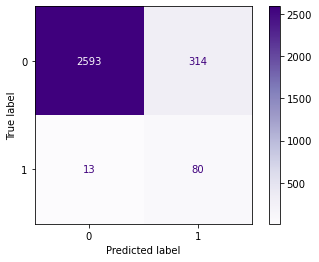

In [44]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_svm,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative :2593
* False Positive:314
* False Negative:13
* True Positive :80

In [45]:
tn_svm=2593
fp_svm=314
fn_svm=13
tp_svm=80

## 3.Decision Tree Classifier

In [46]:
clf_dt=DecisionTreeClassifier(max_depth = 3)
clf_dt.fit(x_under_sample.values,y_under_sample.values)
pred_dt=clf_dt.predict(x_test)
print(pred_dt)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [47]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [48]:
features=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Target']
classes=['0','1']

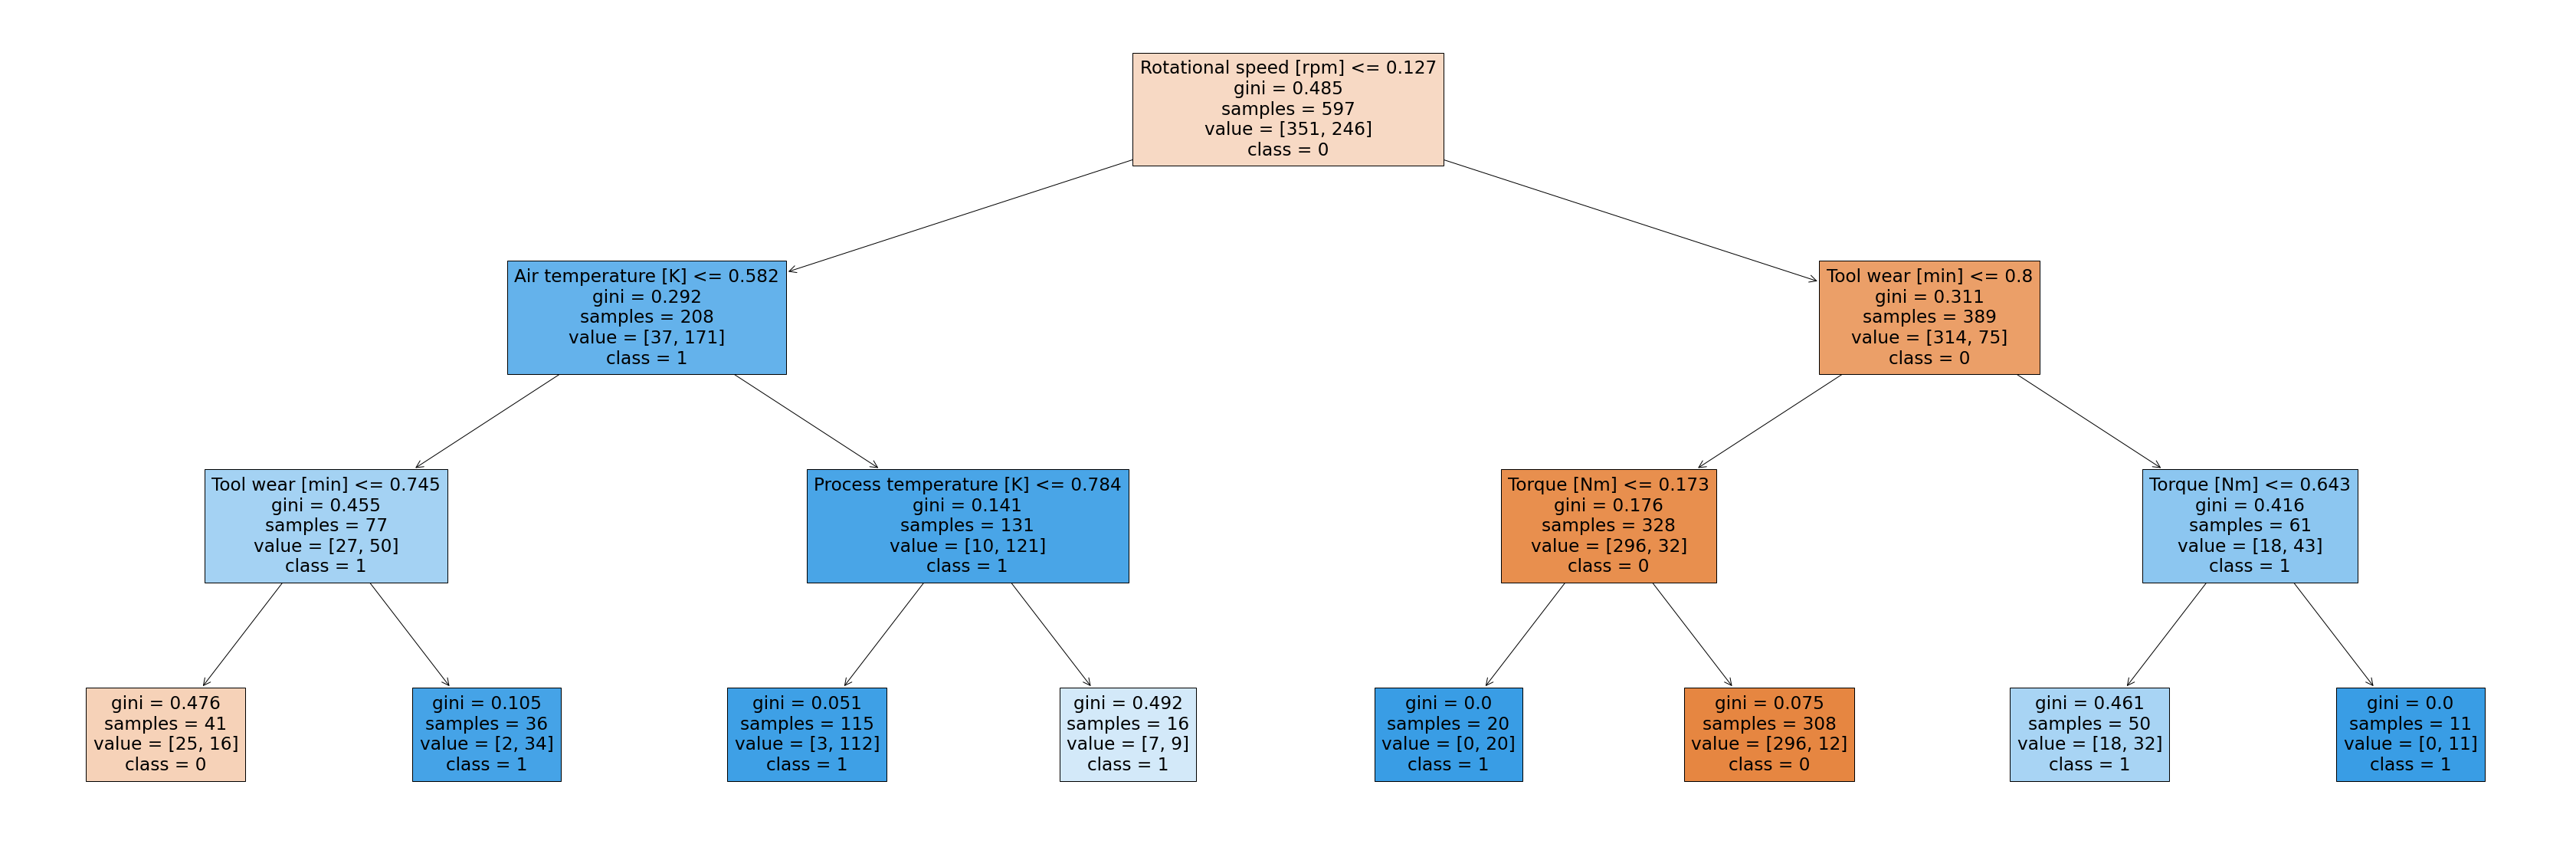

In [49]:
# plotting the Decisison Trees
plt.figure(figsize=(60,20))
plot_tree(clf_dt,filled=True,feature_names=features,class_names=classes)
plt.show()

* Here,we can see that the rode node starts from 'Rotational speed [rpm]' with gini index equal to 0.485 and the class predicted is 0 or the 'No Failure' class.Here in each node,it gives the values of the features and the gini index of the split as well as the class predicted by the split.The maximum number of subtrees of this decision tree is 3.The main features here are- 'Rotational speed [rpm]' , 'Air temperature [K]' , 'Tool wear [min]' , 'Process temperature [K]'  and  'Torque [Nm]'.


* The class is 0 (No Failure) if the value of the feature 'Rotational speed [rpm]' is less than or equal to 0.127 with a gini index of 0.485 and this is then split into the node 'Air temperature [K]' with a value less than or equal to 0.582 and gini index of 0.292 with the class predicted to be 1 (Failure).If the 'Air temperature [K]' value is less than 0.582 it is divided into 'Tool wear [min]' node with gini index of 0.455 and the predicted class is 1 (Failure).If the above node value is satisfied,the gini index for the split is 0.476 and the predicted class is 0 (No Failure).


* The class is 0 (No Failure) if the value of the feature  'Rotational speed [rpm]' is greater than or equal to 0.127 with a gini index of 0.485.It is then split it into node 'Tool wear [min]' with a value less than or equal to 0.8 and a gini index of 0.311 with class prediction to be 0 (No Failure).

In [50]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc3=accuracy_score(y_test,pred_dt)
print("Accuracy         :",acc3)

prec3=precision_score(y_test,pred_dt,average="weighted")
print("Precision Score  :",prec3)

recall3=recall_score(y_test,pred_dt,average="weighted")
print("Recall Score     :",recall3)


f1_dt=f1_score(y_test,pred_dt,average="weighted")
print("f1 Score         :",f1_dt)

Accuracy         : 0.885
Precision Score  : 0.9651584873936313
Recall Score     : 0.885
f1 Score         : 0.9171915993097367


* Accuracy         : 0.885 (Here Accuracy comes out to be around 89%,thus we can say that 89/100 predicitons are correct).
* Precision Score  : 0.9651584873936313 (Our model has a precision of 0.97, in other words, when it predicts a failure, it is correct 97% of the time).
* Recall Score     : 0.885 (Our model has a recall of 0.89, in other words, it correctly identifies 89% of all failures).
* f1 Score         : 0.9171915993097367

In [51]:
#Classification Report
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2907
           1       0.18      0.73      0.28        93

    accuracy                           0.89      3000
   macro avg       0.58      0.81      0.61      3000
weighted avg       0.97      0.89      0.92      3000



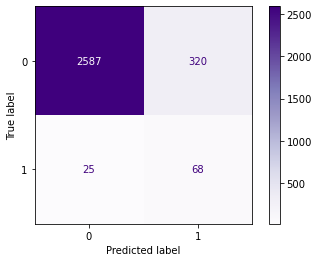

In [52]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_dt,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative :2587
* False Positive:320
* False Negative:25
* True Positive :68


In [53]:
tn_dt=2587
fp_dt=320
fn_dt=25
tp_dt=68

## 4.Random Forest Classifier

In [54]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_under_sample.values,y_under_sample.values)
pred_rf=clf_rf.predict(x_test)
print(pred_rf)

[0 0 0 ... 0 0 0]


<ipython-input-54-ecd45f0ce28f>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [55]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc4=accuracy_score(y_test,pred_rf)
print("Accuracy        :",acc4)

prec4=precision_score(y_test,pred_rf)
print("Precision Score :",prec4)

recall4=recall_score(y_test,pred_rf)
print("Recall Score    :",recall4)


f1_rf=f1_score(y_test,pred_rf)
print("f1 Score        :",f1_rf)

Accuracy        : 0.9043333333333333
Precision Score : 0.23351648351648352
Recall Score    : 0.9139784946236559
f1 Score        : 0.37199124726477023


* Accuracy        : 0.9056666666666666 (Here Accuracy comes out to be around 91%,thus we can say that 91/100 predicitons are correct).
* Precision Score : 0.23756906077348067(Our model has a precision of 0.24, in other words, when it predicts a failure, it is correct 24% of the time).
* Recall Score    : 0.9247311827956989 (Our model has a recall of 0.92, in other words, it correctly identifies 92% of all failures).
* f1 Score        : 0.378021978021978


In [56]:
#Classification Report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2907
           1       0.23      0.91      0.37        93

    accuracy                           0.90      3000
   macro avg       0.62      0.91      0.66      3000
weighted avg       0.97      0.90      0.93      3000



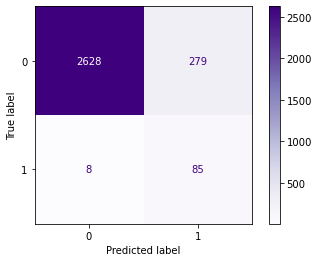

In [57]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative    :2631
* False Positive   :276
* False Negative   :7
* True Positive    :86

In [58]:
tn_rf=2631
fp_rf=276
fn_rf=7
tp_rf=86

## 5.Naive Bayes Classifier

In [59]:
clf_nb=GaussianNB()
clf_nb.fit(x_under_sample.values, y_under_sample.values)
pred_nb=clf_nb.predict(x_test)
print(pred_nb)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but GaussianNB was fitted without feature names



In [60]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc5=accuracy_score(y_test,pred_nb)
print("Accuracy       :",acc5)

prec5=precision_score(y_test,pred_nb)
print("Precision Score:",prec5)

recall5=recall_score(y_test,pred_nb)
print("Recall Score   :",recall5)


f1_nb=f1_score(y_test,pred_nb)
print("f1 Score       :",f1_nb)

Accuracy       : 0.885
Precision Score: 0.17692307692307693
Recall Score   : 0.7419354838709677
f1 Score       : 0.2857142857142857


* Accuracy       : 0.885 (Here Accuracy comes out to be around 89%,thus we can say that 89/100 predicitons are correct).
* Precision Score: 0.17692307692307693 (Our model has a precision of 0.18, in other words, when it predicts a failure, it is correct 18% of the time).
* Recall Score   : 0.7419354838709677 (Our model has a recall of 0.74, in other words, it correctly identifies 74% of all failures).
* f1 Score       : 0.2857142857142857

In [61]:
#Classification Report
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2907
           1       0.18      0.74      0.29        93

    accuracy                           0.89      3000
   macro avg       0.58      0.82      0.61      3000
weighted avg       0.97      0.89      0.92      3000



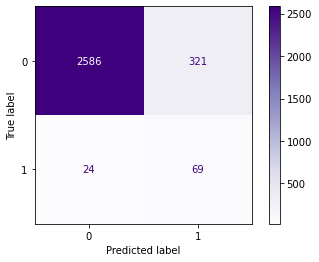

In [62]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_nb,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative    :2586
* False Positive   :321
* False Negative   :24
* True Positive    :69

In [63]:
tn_nb=2586
fp_nb=321
fn_nb=24
tp_nb=69

## 6.Logistic Regression

In [64]:
log_reg=LogisticRegression()
log_reg.fit(x_under_sample.values,y_under_sample.values)
pred_log=log_reg.predict(x_test)
print(pred_log)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [65]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc6=accuracy_score(y_test,pred_log)
print("Accuracy        :",acc6)

prec6=precision_score(y_test,pred_log)
print("Precision Score :",prec6)

recall6=recall_score(y_test,pred_log)
print("Recall Score    :",recall6)


f1_log=f1_score(y_test,pred_log)
print("f1 Score        :",f1_log)

Accuracy        : 0.8786666666666667
Precision Score : 0.1569620253164557
Recall Score    : 0.6666666666666666
f1 Score        : 0.2540983606557377


* Accuracy        : 0.8786666666666667 (Here Accuracy comes out to be around 88%,thus we can say that 88/100 predicitons are correct).
* Precision Score : 0.1569620253164557 (Our model has a precision of 0.16, in other words, when it predicts a failure, it is correct 16% of the time).
* Recall Score    : 0.6666666666666666 (Our model has a recall of 0.66, in other words, it correctly identifies 66% of all failures).
* f1 Score        : 0.2540983606557377

In [66]:
#Classification Report
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93      2907
           1       0.16      0.67      0.25        93

    accuracy                           0.88      3000
   macro avg       0.57      0.78      0.59      3000
weighted avg       0.96      0.88      0.91      3000



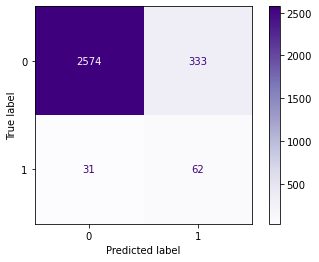

In [67]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_log,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative :2574
* False Positive:333
* False Negative:31
* True Positive :62


In [68]:
tn_log=2574
fp_log=333
fn_log=31
tp_log=62

## 7.Neural Network Classifier

In [69]:
clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)
clf.fit(x_train,y_train)
pred_nn=clf.predict(x_test)
print(pred_nn)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [70]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc7=accuracy_score(y_test,pred_nn)
print("Accuracy        :",acc7)

prec7=precision_score(y_test,pred_nn)
print("Precision Score :",prec7)

recall7=recall_score(y_test,pred_nn)
print("Recall Score    :",recall7)


f1_nn=f1_score(y_test,pred_nn)
print("f1 Score        :",f1_nn)

Accuracy        : 0.9736666666666667
Precision Score : 0.6842105263157895
Recall Score    : 0.27956989247311825
f1 Score        : 0.3969465648854961


* Accuracy        : 0.9736666666666667 (Here Accuracy comes out to be around 97%,thus we can say that 97/100 predicitons are correct).
* Precision Score : 0.6842105263157895 (Our model has a precision of 0.68, in other words, when it predicts a failure, it is correct 68% of the time).
* Recall Score    : 0.27956989247311825 (Our model has a recall of 0.28, in other words, it correctly identifies 28% of all failures).
* f1 Score        : 0.3969465648854961

In [71]:
#Classification Report
print(classification_report(y_test,pred_nn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.68      0.28      0.40        93

    accuracy                           0.97      3000
   macro avg       0.83      0.64      0.69      3000
weighted avg       0.97      0.97      0.97      3000



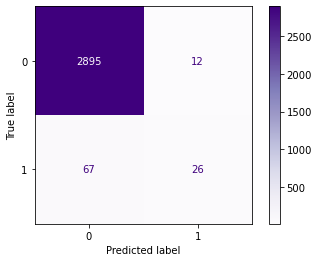

In [72]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_nn,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative :2895
* False Positive:12
* False Negative:67
* True Positive :26


In [73]:
tn_nn=2895
fp_nn=12
fn_nn=67
tp_nn=26

## 8.XG Boost Classifier

In [74]:
Xg_model=GradientBoostingClassifier()
Xg_model.fit(x_under_sample.values,y_under_sample.values)
pred_xg=Xg_model.predict(x_test)
print(pred_xg)

[0 0 0 ... 0 0 0]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



In [75]:
#Calculating the Accuracy,Precision,Recall,f1 Score of the model

acc8=accuracy_score(y_test,pred_xg)
print("Accuracy        :",acc8)

prec8=precision_score(y_test,pred_xg)
print("Precision Score :",prec8)

recall8=recall_score(y_test,pred_xg)
print("Recall Score    :",recall8)


f1_xg=f1_score(y_test,pred_xg)
print("f1 Score        :",f1_xg)

Accuracy        : 0.9193333333333333
Precision Score : 0.26498422712933756
Recall Score    : 0.9032258064516129
f1 Score        : 0.40975609756097564


* Accuracy        :0.9196666666666666 (Here Accuracy comes out to be around 92%,thus we can say that 92/100 predicitons are correct).
* Precision Score :0.2626582278481013 (Our model has a precision of 0.27, in other words, when it predicts a failure, it is correct 27% of the time).
* Recall Score    :0.8924731182795699 (Our model has a recall of 0.91, in other words, it correctly identifies 91% of all failures).
* f1 Score        : 0.40586797066014674

In [76]:
#Classification Report
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2907
           1       0.26      0.90      0.41        93

    accuracy                           0.92      3000
   macro avg       0.63      0.91      0.68      3000
weighted avg       0.97      0.92      0.94      3000



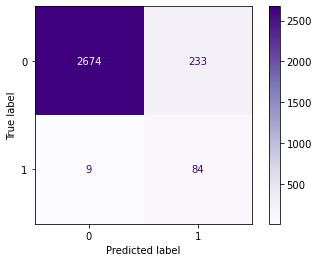

In [77]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_xg,cmap="Purples")

From the confusion matrix we get the following values :

* True Negative :2674
* False Positive:233
* False Negative:10
* True Positive :83


In [78]:
tn_xg=2674
fp_xg=233
fn_xg=10
tp_xg=83

# Comparing The 'fp' Values Of The Model

Decision Tree 320
Support Vector Machine 314
Naive Bayes 321
Logistic Regression 333
K Nearest Neighbor 253
XgBoost 233
Neural Network 12
Random Forest 276


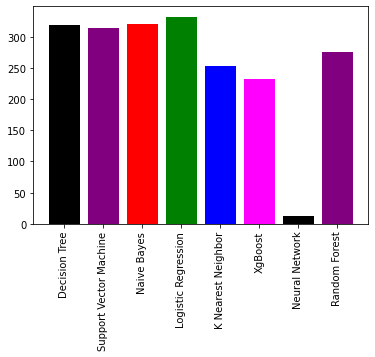

In [79]:
fp_models = {"Decision Tree": fp_dt, "Support Vector Machine":fp_svm, "Naive Bayes":fp_nb, "Logistic Regression": fp_log, 
            "K Nearest Neighbor":fp_knn, "XgBoost": fp_xg,'Neural Network':fp_nn,"Random Forest":fp_rf}
for key, value in fp_models.items():
    print (key, value)
    
fp_keys = list(fp_models.keys())
fp_values = list(fp_models.values())

plt.bar(range(len(fp_models)), fp_values, tick_label=fp_keys,color=['black','purple', 'red', 'green', 'blue', 'magenta'])
plt.xticks(rotation = 90)
plt.show()

The fp values in ascending order as follows:

Neural Network(12) < XgBoost(233) < K Nearest Neighbour(253) < Random Forest (276) <Support Vector Machine(314) < Decision Tree (320) < Naive Bayes (321) < Logistic Regression (333)

False Positive:An instance for which predicted value is positive but actual value is negative.Here it implies how many failure condition are identified as not having failure.

Lower fp values are preferred.So,here we prefer Neural Network.

# Comparing True Negative,False Positive,False Negative,True Positive Values

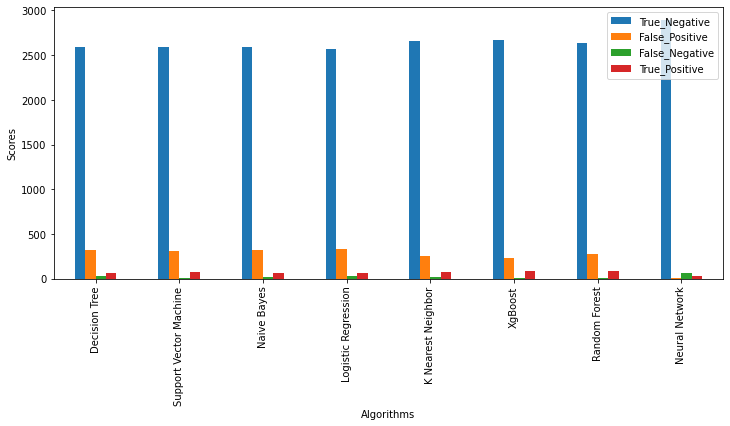

In [80]:
models_data=pd.DataFrame([['Decision Tree',tn_dt,fp_dt,fn_dt,tp_dt],['Support Vector Machine',tn_svm,fp_svm,fn_svm,tp_svm],['Naive Bayes',tn_nb,fp_nb,fn_nb,tp_nb],
                           ['Logistic Regression',tn_log,fp_log,fn_log,tp_log],['K Nearest Neighbor',tn_knn,fp_knn,fn_knn,tp_knn],['XgBoost',tn_xg,fp_xg,fn_xg,tp_xg],['Random Forest',tn_rf,fp_rf,fn_rf,tp_rf],['Neural Network',tn_nn,fp_nn,fn_nn,tp_nn]],
                          columns = ['Scores','True_Negative','False_Positive','False_Negative','True_Positive'])
models_data.plot(x='Scores', kind ='bar', stacked = False, xlabel = 'Algorithms', ylabel = 'Scores',figsize = (12, 5))
plt.show()

* True Negative (tn) is highest for Neural Network
* False Positive (fp) is highest for Logistic Regression
* False Negative (fn) is highest for Neural Network
* True Positive (tp) is highest for Random Forest

# Comparing Model Scores

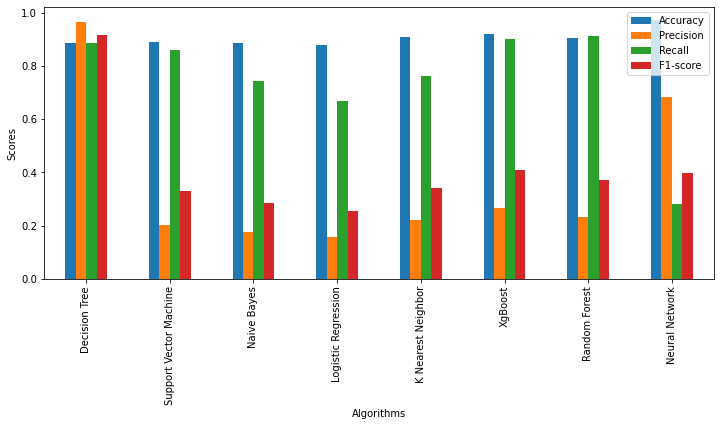

In [81]:
models_data=pd.DataFrame([['Decision Tree', acc3, prec3, recall3, f1_dt], ['Support Vector Machine', acc2, prec2, recall2, f1_svm],['Naive Bayes', acc5, prec5, recall5, f1_nb],
                           ['Logistic Regression', acc6, prec6, recall6, f1_log],['K Nearest Neighbor', acc1, prec1, recall1, f1_knn],['XgBoost', acc8, prec8, recall8, f1_xg],['Random Forest',acc4,prec4,recall4,f1_rf],['Neural Network',acc7,prec7,recall7,f1_nn]],
                          columns = ['Scores','Accuracy', 'Precision', 'Recall', 'F1-score'])

models_data.plot(x='Scores', kind ='bar', stacked = False, xlabel = 'Algorithms', ylabel = 'Scores',figsize = (12, 5))
plt.show()


From the above plot following inferences can be made:

* Accuracy for Neural Network is highest.Accuracy is 0.9736666666666667 (Here Accuracy comes out to be around 97%,thus we can say that 97/100 predicitons made by Neural Network are correct).

* Precision is highest for Decision Tree.Precision Score is 0.9651584873936313 (Our model has a Precision of 0.97, in other words, when it predicts a failure, it is correct 97% of the time).

* Recall is highest for Random Forest.Recall Score is 0.92439784946236559 (Our model has a Recall of 0.924, in other words, it correctly identifies 92% of all failures).

* f1 Score is highest for Decision Tree.f1 Score is  0.9171915993097367 (Here since Decision Tree has a better f1 Score we can say that Decision Tree is a better model ).

Summary:

Our project is Predictive Maintenance using Machine Learning model.The dataset for the project was obtained from Kaggle.The link is given in the description (above).The dataset consists of 10,000 rows and 10 columns.The target column is 'Target'.The necessary data pre processing was done and EDA was conducted on the dataset.Initially,the dataset is unbalanced one (Target is unbalanced).Here we use under sampling to balance the 'Target'.The heatmap is another important feature used in EDA.From the heatmap we concluded that 'Torque' and 'Tool wear' has significant contribution towards 'Target' (Failure or No Failure).The heatmap conclusion remained the same before and after sampling.Only a slight change in values of the features of the heatmap was noted after sampling.After EDA we applied different models to our dataset.Here,for the project we use 8 different models.

The models used are-KNN,SVM,Decision Tree,Random Forest,Naive Bayes,Logistic Regression,Neural Network and XgBoost.The highest accuracy was shown by Neural Network about 97%.Decision Tree has the highest value for precision at 97%.Random Forest has the highest recall at 92%.Now comparing the overall f1 scores of the eight models we see that Decision Tree tops them all at 92%.We,can conclude that out of the eight models,Decision Tree is the better model.